# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


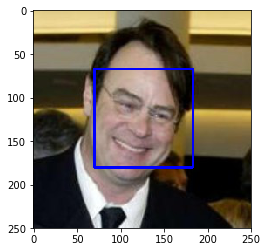

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
-  Faces detected in 98.00% of the sample human dataset.
-  Faces detected in 17.00% of the sample dog dataset.

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
list_face_correct = []
list_face_false = []

face_count_correctlyDetected = 0
face_count_detected_in_dogFiles = 0

for i in range(len(human_files_short)):
    list_face_correct.append(face_detector(human_files_short[i]))
    if list_face_correct[i] == True:
        face_count_correctlyDetected +=1

for i in range(len(dog_files_short)):
    list_face_false.append(face_detector(dog_files_short[i]))
    if list_face_false[i] == True:
        face_count_detected_in_dogFiles +=1
        

#the accuracy of the human_images
accuracy_human_face = face_count_correctlyDetected / len(human_files_short)

#the accuracy of the dog_images
accuracy_dog_images = face_count_detected_in_dogFiles / len(dog_files_short)

print('Faces detected in {:.2f}% of the sample human dataset.'.format(accuracy_human_face*100))
print('Faces detected in {:.2f}% of the sample dog dataset.'.format(accuracy_dog_images*100))

Faces detected in 98.00% of the sample human dataset.
Faces detected in 17.00% of the sample dog dataset.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 99207494.00it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    #Open the image and convert it to RGB
    image = Image.open(img_path).convert('RGB')
    
    # All pre-trained models expect input images normalized in the same way, 
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), 
    # where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and 
    #then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 
    # We can use the following transform to normalize	
    
    normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])
    
    #convert data to a normalized torch.FloatTensor
    transform = transforms.Compose([transforms.Scale(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               normalize])
    
    # adding that extra "batch dimension" (the model wants a batch of images)
    image =  transform(image)[:3,:,:].unsqueeze(0)
    
    
    if use_cuda:
        image = image.cuda()
        
        
    # getting a prediciton
    # Returns a Tensor of shape (batch, num class labels)
    predicition = VGG16(image)
    
    # Our prediction will be the index of the class label with the largest value
    # The second return value is the index location of each maximum value found (argmax).
    return torch.max(predicition,1)[1].item()   # predicted class index 

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    
    return ((prediction <= 268) & (prediction >= 151))  # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
-  In the human_files : 0% dogs
-  In the dog_files : 100% dogs

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
h_perc , d_perc = 0 , 0

for h_file in human_files_short:
  if(dog_detector(h_file)):
    h_perc += 1

for d_file in dog_files_short:
  if(dog_detector(d_file)):
    d_perc += 1
        
print('In the human_files : {}% dogs'.format(h_perc))
print('In the dog_files : {}% dogs'.format(d_perc))


/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.


In the human_files : 0% dogs
In the dog_files : 100% dogs


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torchvision.transforms as transforms


batch_size = 32

 # Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
 
# Location of data
dog_file='/data/dog_images/'

train=os.path.join(dog_file,'train')
valid=os.path.join(dog_file,'valid')
test=os.path.join(dog_file,'test')


# Datasets from each folder
train_file=datasets.ImageFolder(train,transform=image_transforms['train'])
valid_file=datasets.ImageFolder(valid,transform=image_transforms['valid'])
test_file=datasets.ImageFolder(test,transform=image_transforms['test'])


# To avoid loading all of the data into memory at once, I used training DataLoaders. First, I created 
# a dataset object from the image folders, and then I passed these to a DataLoader. 
# At training time, the DataLoader will load the images from disk, apply the transformations, 
# and yield a batch. To train and validation, we'll iterate through all the batches in the respective 
# DataLoader.
# One crucial aspect is to shuffle the data before passing it to the network. 
# This means that the ordering of the image categories changes on each pass through the data 
# (one pass through the data is one training epoch).



loaders={
    'train':torch.utils.data.DataLoader(train_file,batch_size,shuffle=True),
    'valid':torch.utils.data.DataLoader(valid_file,batch_size,shuffle=True),
    'test': torch.utils.data.DataLoader(test_file,batch_size,shuffle=True)
}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

-  During image preprocessing, I simultaneously prepare the images for our network and 
apply data augmentation to the training set. Each model will have different input requirements, 
but if I read through what Imagenet requires, I figure out that our images need to be 224x224 
and normalized to a range.
-  To process an image in PyTorch, we use transforms , simple operations applied to arrays. 
-  The transforms I used  are as follows:
    - Resized
    - Image dataset is centered and cropped to 224 x 224
    - Then it is converted to a tensor
    - Normalized with mean and standard deviation 
<br>
<br>
The end result of passing through these transforms are tensors that can go into our network.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [59]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 64, 11, stride=4, padding=2)
        
        self.conv2 = nn.Conv2d(64, 192, 5, padding=2)
       
        self.conv3 = nn.Conv2d(192, 256, 3, padding=2)
        
        self.conv4 = nn.Conv2d(256, 512, 3, padding=2)
       
        
        
        # max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        
        
        self.fc1 = nn.Linear(512 * 4 * 4, 5000)
        
        self.fc2 = nn.Linear(5000, 2500)
       
        self.fc3 = nn.Linear(2500, 500)
      
        self.fc4 = nn.Linear(500, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
        # batch normalization
        self.batn = nn.BatchNorm2d(192)
        self.batn2 = nn.BatchNorm2d(256)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batn(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.batn2(x)
        x = self.pool(F.relu(self.conv4(x)))
        
        
        # flatten image input
        x = x.view(-1, 512 * 4 * 4)
        
        # fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

<p> General Architecture  [INPUT - CONV - RELU - POOL - FC] </p>

<p>
Gaussian filters, probably one of the most used filters in image processing, are based on 
gaussian function in which the top value is achieved on the axis of symmetry. 
Therefore, whatever this number of pixels maybe, the length of each side of our symmetrically 
shaped kernel is 2*n+1 (each side of the anchor + the anchor pixel), and 
therefore filter/kernels are always odd sized.
This is the main reason why such kinds of kernels are preferably to be odd.
So I used 3x3 kernel size with zero padding.
Using a 3x3 filter expresses most information about the image across all the channels 
(zero padding allows us to achieve this).
So I used 3x3 kernel size with zero padding.
</p>

<p>
My CNN architecture consists of 4 Convolutional Layers and 4 Fully Connected Layers.
I tried to aplly  a combination of AlexNet Architecture and VGGNet Architecture. 
For Max pooling I used kernel_size 3x3 with stride=1 padding=2.
Its function is to progressively reduce the spatial size of the representation to reduce 
the amount of parameters and computation in the network, and hence to also control overfitting.
I used 2 BatchNormalizations after the 2nd and 3rd convolution layers.
For CNN architectures, I worked on the following article : https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b
</p>


<p>
The important fact to note is that the architecture applies a series of convolutional layers, 
followed by a 'Max Pooling Layer'. And each convolutional layer changes the output of the 
previous layer to generate a new set of filters. and it generates much more filters. 
</p>


<p>
Between fully connected layers, dropout technique(with probability = 0.25) is used to 
overcome the overfitting  problem.
</p>

<p>
The Rectified Linear Units(ReLU) functionality is applied to each specific pixel in the image 
after each convolutional layer.It replaces negative values with '0', which potentially helps 
the neural network understand the non-linear relationships.
We can observe that after the ReLU is applied, then it is followed by a 'Max Pooling Layer'.
The potential advantage of a 'Max-Pooling Layer' is, it reduces the filter size which increases 
the pace of training and there by descreasing the scope of overfitting
The later layers are used for analyzing complex patterns in the data i.e., dog and human faces
</p>


<p>
Also I used batch normalization. To sum up, it is a tecnique to apply unit gausssian activations 
throughout your network. By this way your variances probably will not go to zero or to explode. 
(Source: CS231n Winter 2016: Lecture 5: Neural Networks Part 2)
</p>


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [60]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [61]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # calculate average losses
        train_loss = train_loss/len(train_file)
        valid_loss = valid_loss/len(valid_file)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(50, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000732 	Validation Loss: 0.005852
Validation loss decreased (inf --> 0.005852).  Saving model ...
Epoch: 2 	Training Loss: 0.000731 	Validation Loss: 0.005846
Validation loss decreased (0.005852 --> 0.005846).  Saving model ...
Epoch: 3 	Training Loss: 0.000730 	Validation Loss: 0.005838
Validation loss decreased (0.005846 --> 0.005838).  Saving model ...
Epoch: 4 	Training Loss: 0.000729 	Validation Loss: 0.005826
Validation loss decreased (0.005838 --> 0.005826).  Saving model ...
Epoch: 5 	Training Loss: 0.000727 	Validation Loss: 0.005807
Validation loss decreased (0.005826 --> 0.005807).  Saving model ...
Epoch: 6 	Training Loss: 0.000725 	Validation Loss: 0.005786
Validation loss decreased (0.005807 --> 0.005786).  Saving model ...
Epoch: 7 	Training Loss: 0.000721 	Validation Loss: 0.005763
Validation loss decreased (0.005786 --> 0.005763).  Saving model ...
Epoch: 8 	Training Loss: 0.000717 	Validation Loss: 0.005708
Validation loss decreased (0.00576

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [62]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.789205


Test Accuracy: 29% (244/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [63]:
import torchvision.models as models
import torch.nn as nn
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
# Loading in a pre-trained model 
model_transfer=models.resnet50(pretrained=True)

# Freeze model weights
for param in model_transfer.parameters():
    param.requires_grad = False


num_features = model_transfer.fc.in_features

#retrieve the fully connected layer of pre-trained model and replace it with our own linear layer

model_transfer.fc = nn.Linear(num_features, 133)

print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 68585381.01it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
<p>
I loaded pre-trained weights from a network trained on a large dataset.
Freezed all the weights in the lower (convolutional) layers: the layers to freeze are 
adjusted depending on similarity of new task to original dataset.
<br>
Last fully connected layer of pre-trained network was taken to construct
a new last linear layer.
<br>
Also we could completely replaced the upper layer of the network with a custom Sequential linear layers.
To avoid overfitting on this small data set, the weights of the original network 
was held constant rather than re-training the weights.
<br>
The chosen arhitecture includes a great deal of Batch Normalizations for the variance considerations.
For this reason, I think this architecture is suitable for the current problem.
</p>

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [64]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [67]:
# train the model
n_epochs=10

model_transfer = train(n_epochs, loaders, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000130 	Validation Loss: 0.002160
Validation loss decreased (inf --> 0.002160).  Saving model ...
Epoch: 2 	Training Loss: 0.000138 	Validation Loss: 0.001978
Validation loss decreased (0.002160 --> 0.001978).  Saving model ...
Epoch: 3 	Training Loss: 0.000125 	Validation Loss: 0.002356
Epoch: 4 	Training Loss: 0.000123 	Validation Loss: 0.001909
Validation loss decreased (0.001978 --> 0.001909).  Saving model ...
Epoch: 5 	Training Loss: 0.000115 	Validation Loss: 0.002319
Epoch: 6 	Training Loss: 0.000107 	Validation Loss: 0.001806
Validation loss decreased (0.001909 --> 0.001806).  Saving model ...
Epoch: 7 	Training Loss: 0.000123 	Validation Loss: 0.002153
Epoch: 8 	Training Loss: 0.000119 	Validation Loss: 0.003365
Epoch: 9 	Training Loss: 0.000113 	Validation Loss: 0.002443
Epoch: 10 	Training Loss: 0.000120 	Validation Loss: 0.002718


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [69]:
test(loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.717989


Test Accuracy: 82% (686/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [72]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = train_file.classes

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img=Image.open(img_path)
    
    transform=transforms.Compose([ transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    #from image to tensor
    image_tensor = transform(img).float()
    #adds a dimension with a length of one
    image_ten = image_tensor.unsqueeze_(0)
    
    if use_cuda:
        img=image_ten.cuda()
        
    model_transfer.eval()  #evaluation mode 
    output = model_transfer(img)
    index = output.data.cpu().numpy().argmax() #index of the max value (predicted)
    
    return class_names[index]
  

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [73]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
     ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    ## convert image to RGB color 
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image
    plt.imshow(rgb_image)
    plt.show()
    
    #Find whether the image is a dog a human or none
    if dog_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print("Dogs Detected! That is a dog. Breed:  {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(img_path)
        print("That's a human, but it looks like a {0}".format(prediction))
    else:
        print("Error! Can't detect anything..")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

<p> We can apply Bayesian optimization for hyper-parameter tuning and it often selects gradual increase of 
drop probability from the first convolutional layer down the network. This makes sense 
because the number of filters also increases, so does the chance of co-adaptation. 
As a result, the architecture often looks like this:
CONV-1: filter=3x3, size=32, dropout between 0.0-0.1
CONV-2: filter=3x3, size=64, dropout between 0.1-0.25
This optimization could increase the performance oand acccuracy of our model.
</p>
    
<p> For comparing and selecting a model more efficiently, we can use k-fold Cross-Validation.
The general procedure is as follows:

- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
	- Take the group as a hold out or test data set
	- Take the remaining groups as a training data set
	- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores
</p>    

<p> Exploring different sort of architectural models that could potentially assist in the reduction of 
the time of prediction while maintaining a consistent accuracy of the model.   
The model accuracy is quite diverse for all the classes. 
Hence, it will be quite flexible for the model to increase it's accuracy by adding more data.   
</p> 

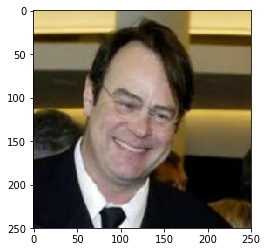

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


That's a human, but it looks like a 089.Irish_wolfhound


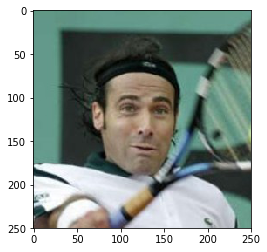

That's a human, but it looks like a 056.Dachshund


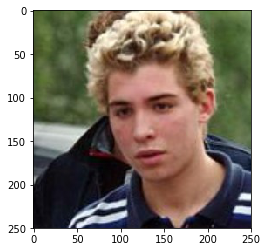

That's a human, but it looks like a 125.Portuguese_water_dog


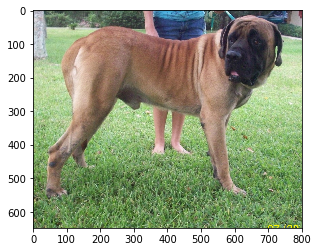

Dogs Detected! That is a dog. Breed:  044.Cane_corso


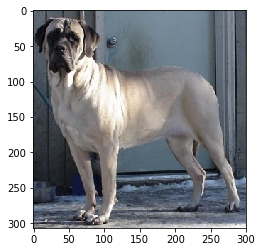

Dogs Detected! That is a dog. Breed:  044.Cane_corso


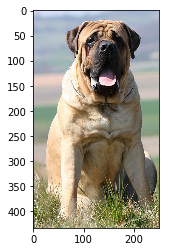

Dogs Detected! That is a dog. Breed:  044.Cane_corso


In [74]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)